In [ ]:
%pip install tensorflow

In [9]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
tf.__version__

'2.20.0'

Epoch 1/120


C:\Users\sherl\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6218 - loss: 3.8777 - val_accuracy: 0.7536 - val_loss: 0.5864
Epoch 2/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6425 - loss: 3.9171 - val_accuracy: 0.7536 - val_loss: 0.5443
Epoch 3/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6839 - loss: 3.4004 - val_accuracy: 0.7536 - val_loss: 0.5251
Epoch 4/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6632 - loss: 3.9447 - val_accuracy: 0.7681 - val_loss: 0.5264
Epoch 5/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6503 - loss: 3.8662 - val_accuracy: 0.7681 - val_loss: 0.5199
Epoch 6/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6891 - loss: 3.6567 - val_accuracy: 0.7681 - val_loss: 0.5121
Epoch 7/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6865 - loss: 3.4496 - val_accuracy: 0.7681 - val_loss: 0.5064
Epoch 8/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6528 - loss: 4.2708 - val_accuracy: 0.7681 - val_loss: 

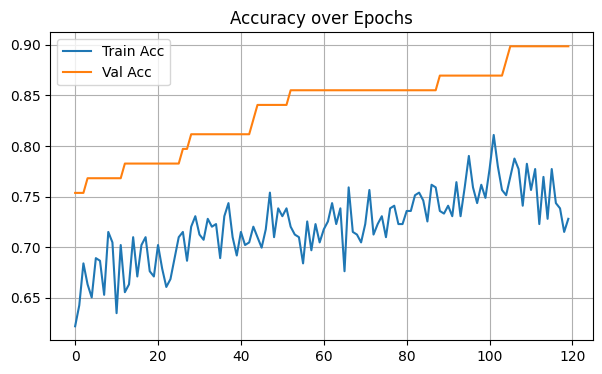

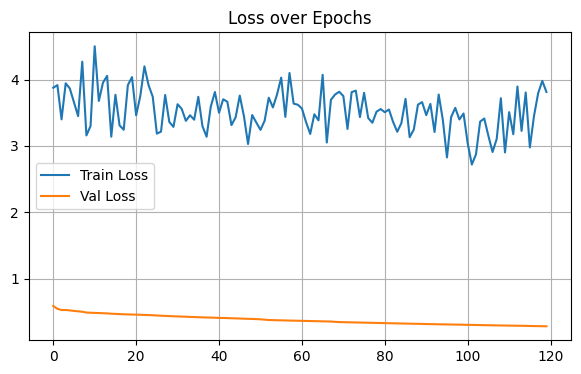

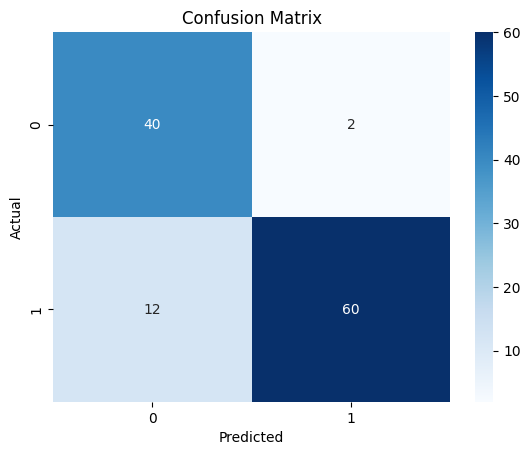

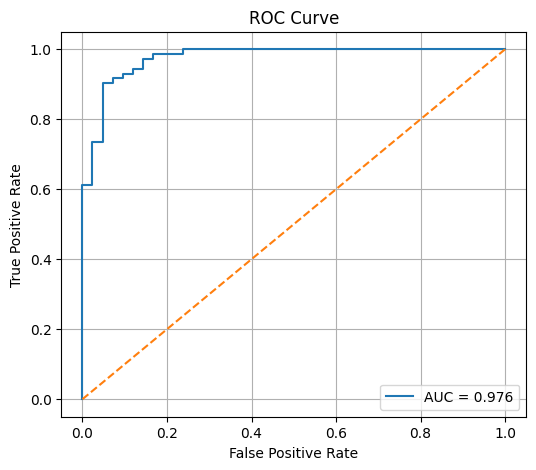

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

"""model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])"""
model=Sequential([
    Dense(1,activation='sigmoid' ,input_dim=X_test.shape[1]),
        Dropout(0.3)
])

model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode='min')

history = model.fit(X_train, y_train, validation_split=0.15, epochs=120, batch_size=16, callbacks=[es], verbose=1)

y_prob = model.predict(X_test).ravel()
y_pred = (y_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", round(accuracy*100, 3), "%")
print("Precision:", round(precision*100, 3), "%")
print("Recall:", round(recall*100, 3), "%")
print("F1 Score:", round(f1*100, 3), "%")
print(classification_report(y_test, y_pred))



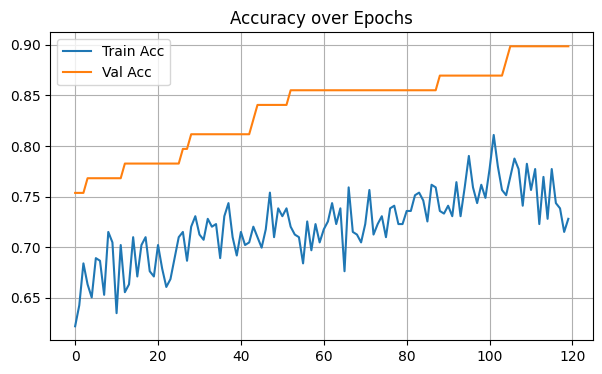

In [5]:
plt.figure(figsize=(7,4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()


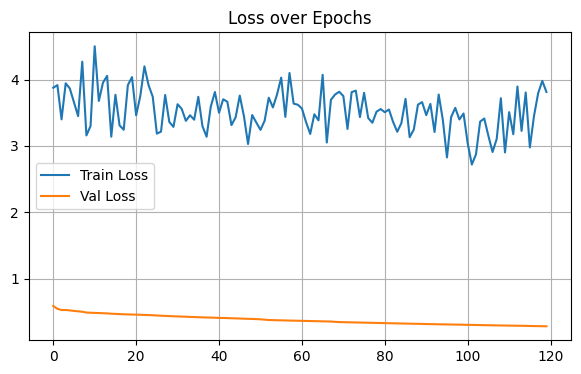

In [6]:

plt.figure(figsize=(7,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()



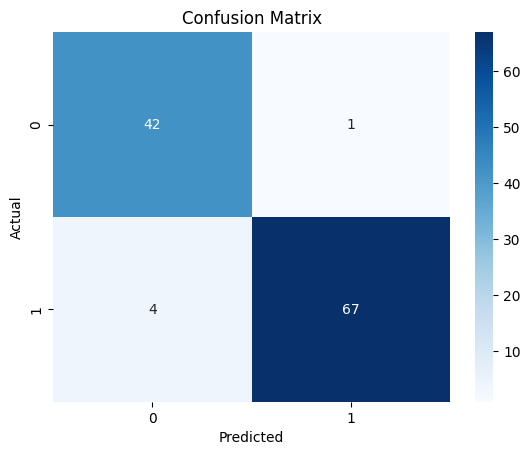

In [51]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d' )
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



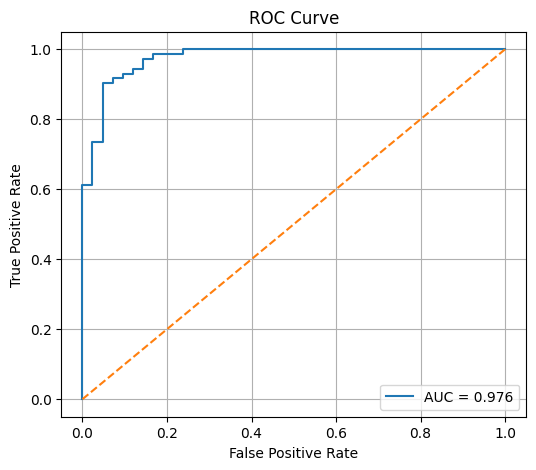

In [8]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
cancer=load_breast_cancer()
X=cancer.data
y=cancer.target
sc=StandardScaler()
x=sc.fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=Sequential([
    Dense(1,activation='sigmoid',input_dim=x.shape[1]),
    Dropout(0.3)
])
model.compile(optimizer=Adam(0.03),loss='binary_crossentropy',metrics=['accuracy'])
es=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True,mode='min')
history=model.fit(x_train,y_train,validation_split=0.25,epochs=50,batch_size=32,callbacks=[es],verbose=1)

Epoch 1/50


C:\Users\sherl\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7977 - loss: 2.9176 - val_accuracy: 0.9474 - val_loss: 0.1476
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7771 - loss: 3.4874 - val_accuracy: 0.9474 - val_loss: 0.1477
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7537 - loss: 3.7700 - val_accuracy: 0.9474 - val_loss: 0.1228
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7859 - loss: 3.3786 - val_accuracy: 0.9561 - val_loss: 0.1099
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8035 - loss: 3.1370 - val_accuracy: 0.9561 - val_loss: 0.1077
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7889 - loss: 3.3704 - val_accuracy: 0.9561 - val_loss: 0.1030
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7889 - loss: 3.3311 - val_accuracy: 0.9649 - val_loss: 0.0987
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8240 - loss: 2.7134 - val_accuracy: 0.9649 - val_loss: 0.

In [44]:
y_pred=model.predict(x_test).ravel()
y_pred=(y_pred>0.5).astype(int)
print(accuracy_score(y_test,y_pred),f1_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred),classification_report(y_test,y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
0.956140350877193 0.9640287769784173 0.9852941176470589 0.9436619718309859               precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.99      0.94      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



Text(0.5, 1.0, 'loss over Train,test')

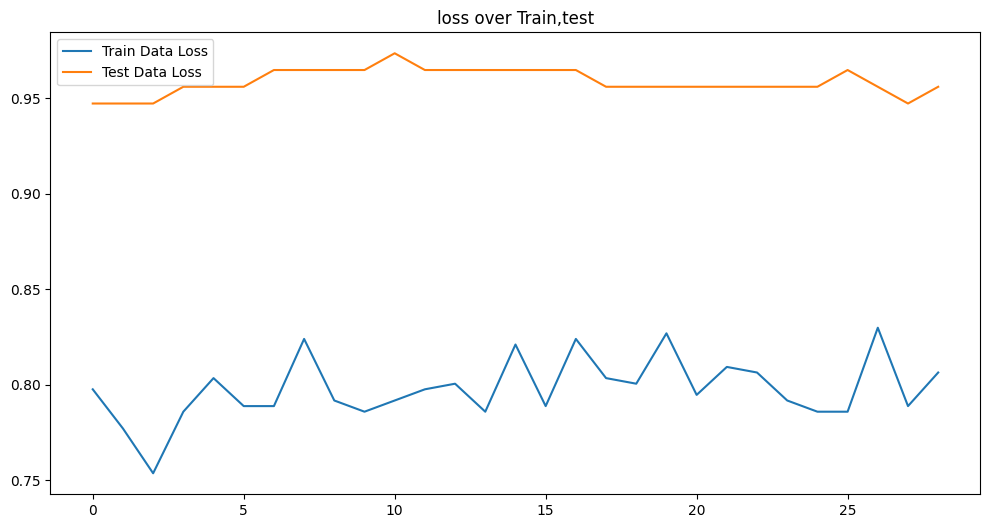

In [46]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'],label='Train Data Loss')
plt.plot(history.history['val_accuracy'],label='Test Data Loss')
plt.legend()
plt.title("loss over Train,test")


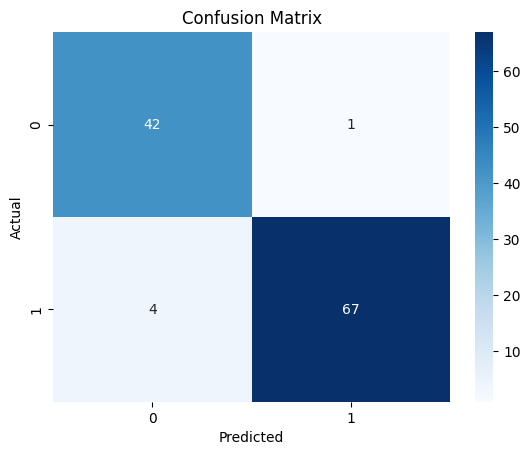

In [55]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,cmap='Blues',fmt='d',annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()